In [1]:
import os, skimage.io, matplotlib.pyplot as plt, numpy as np
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from sklearn.model_selection import StratifiedKFold
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
import random

Using TensorFlow backend.


In [2]:
folderName = "MNIST fashion dataset"
labelNames = ["T-shirt/top",
              "Trouser",
              "Pullover",
              "Dress",
              "Coat",
              "Sandal",
              "Shirt",
              "Sneaker",
              "Bag",
              "Ankle boot"]
#these directly correspond to the folders names 0-9
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory)
        if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        print("loading:",labelNames[int(d)])
        file_names = [os.path.join(label_directory, f)for f in os.listdir(label_directory)]
    
        for f in file_names:
            images.append(skimage.io.imread(f))
            labels.append(int(d))
        
    return images, labels

In [3]:
train_data_path = os.path.join(os.getcwd(),folderName,"training")
images, labels = load_data(train_data_path)

loading: Sandal
loading: Bag
loading: T-shirt/top
loading: Coat
loading: Sneaker
loading: Pullover
loading: Trouser
loading: Dress
loading: Ankle boot
loading: Shirt


In [4]:
test_data_path = os.path.join(os.getcwd(),folderName,"testing")
test_images, test_labels = load_data(test_data_path)

loading: Sandal
loading: Bag
loading: T-shirt/top
loading: Coat
loading: Sneaker
loading: Pullover
loading: Trouser
loading: Dress
loading: Ankle boot
loading: Shirt


In [5]:
#now we are converting them to numpy arrays
images = np.asarray(images)
test_images = np.asarray(test_images)
labels = np.asarray(labels)
test_labels = np.asarray(test_labels)


#and then we splitting them up inot train and validation
train_images,validation_images,train_labels,validation_labels = train_test_split(
    images,
    labels, 
    train_size=0.9, 
    test_size=0.1,
    random_state=0)

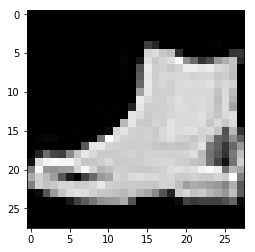

 ^ This is: 9  ^ 


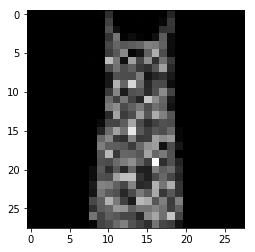

 ^ This is: 3  ^ 


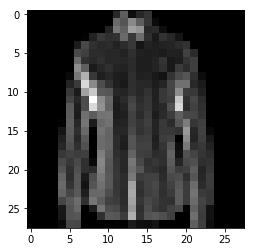

 ^ This is: 6  ^ 


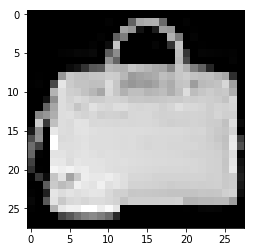

 ^ This is: 8  ^ 


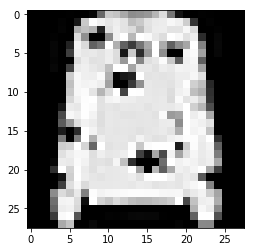

 ^ This is: 2  ^ 


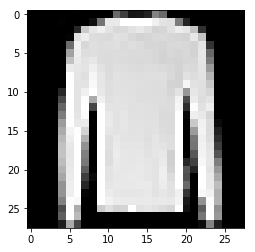

 ^ This is: 2  ^ 


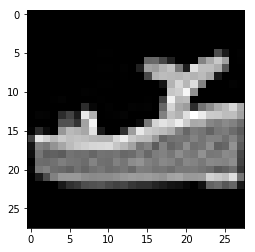

 ^ This is: 5  ^ 


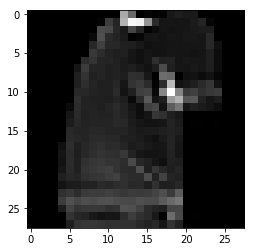

 ^ This is: 0  ^ 


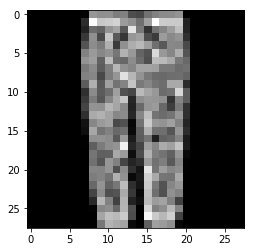

 ^ This is: 1  ^ 


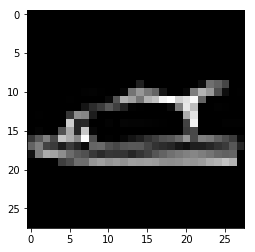

 ^ This is: 5  ^ 


In [6]:
#now quickly testing the right labels are applied
for i in range(0,10):
    plt.plot()
    randImg = random.randint(0,test_images.shape[0])
    plt.imshow(train_images[randImg], cmap=plt.get_cmap('gray'))
    plt.show()
    print(" ^ This is:",train_labels[randImg]," ^ ")


In [7]:
#now reformatting the images a single dimension arrays of pixels
num_pixels = train_images.shape[1] * train_images.shape[2]
train_images = train_images.reshape(train_images.shape[0],num_pixels).astype('float32')
validation_images = validation_images.reshape(validation_images.shape[0],num_pixels).astype('float32')
test_images = test_images.reshape(test_images.shape[0], num_pixels).astype('float32')

In [8]:
train_images = train_images/255
validation_images = validation_images/255
test_images = test_images/255

#now we need to convert these labels to something that can be read
train_labels = np_utils.to_categorical(train_labels)
validation_labels = np_utils.to_categorical(validation_labels)
test_labels = np_utils.to_categorical(test_labels)
num_classes = train_labels.shape[1]



In [9]:
#training the model
model = Sequential()
model.add(Dense(254, input_dim=num_pixels, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(
    train_images, 
    train_labels,
    validation_data=(
        validation_images,
        validation_labels),
    epochs=10)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 5s 95us/step - loss: 0.4910 - acc: 0.8269 - val_loss: 0.4104 - val_acc: 0.8532
Epoch 2/10
54000/54000 [==============================] - 5s 94us/step - loss: 0.3686 - acc: 0.8664 - val_loss: 0.3617 - val_acc: 0.8633
Epoch 3/10
54000/54000 [==============================] - 5s 92us/step - loss: 0.3327 - acc: 0.8784 - val_loss: 0.3619 - val_acc: 0.8628
Epoch 4/10
54000/54000 [==============================] - 4s 82us/step - loss: 0.3085 - acc: 0.8864 - val_loss: 0.3291 - val_acc: 0.8780
Epoch 5/10
54000/54000 [==============================] - 5s 85us/step - loss: 0.2885 - acc: 0.8936 - val_loss: 0.3289 - val_acc: 0.8803
Epoch 6/10
54000/54000 [==============================] - 5s 84us/step - loss: 0.2742 - acc: 0.8990 - val_loss: 0.3284 - val_acc: 0.8835
Epoch 7/10
54000/54000 [==============================] - 4s 77us/step - loss: 0.2609 - acc: 0.9041 - val_loss: 0.3507 - val_acc:

In [10]:
# Testing how accurate the model is on the actual testing data
trainScores = model.evaluate(train_images, train_labels, verbose=0)
print("MLP Accuracy on training set: %.2f%%" % (trainScores[1]*100))

valScores = model.evaluate(validation_images, validation_labels, verbose=0)
print("MLP Accuracy on validation training: %.2f%%" % (valScores[1]*100))

testScores = model.evaluate(test_images, test_labels, verbose=0)
print("MLP Accuracy on test set: %.2f%%" % (testScores[1]*100))

MLP Accuracy on training set: 91.83%
MLP Accuracy on validation training: 88.60%
MLP Accuracy on test set: 87.97%


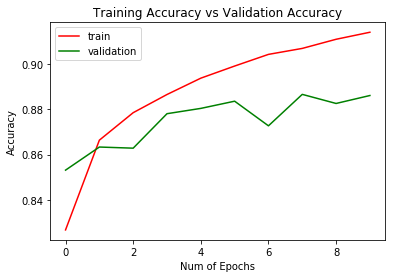

In [11]:
#accuracy of the validation and training
training_accuracy = history.history['acc']
validation_accuracy = history.history['val_acc']

plt.figure(0)
plt.plot(training_accuracy,'r')
plt.plot(validation_accuracy,'g')
plt.xticks(np.arange(0, len(training_accuracy), 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.show()

In [12]:
#attempting k-fold valid to get more accuracy
images = images.reshape(images.shape[0], num_pixels).astype('float32')
images = images/255
temp_labels = labels
labels = np_utils.to_categorical(labels)

kfold = StratifiedKFold(n_splits=5, shuffle=True)
# create model
model = Sequential()
model.add(Dense(250, input_dim=num_pixels, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
  

In [13]:
for train, test in kfold.split(images, temp_labels):
    model.fit(images[train], labels[train], epochs=1, verbose=0)
    scores = model.evaluate(images[test], labels[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 84.52%
acc: 86.46%
acc: 88.79%
acc: 89.31%
acc: 88.88%


In [14]:
testScores = model.evaluate(test_images, test_labels, verbose=0)
print("MLP Accuracy on test set: %.2f%%" % (testScores[1]*100))

MLP Accuracy on test set: 87.14%


Predicted Category:  Ankle boot


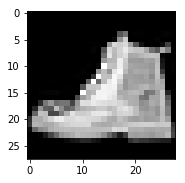

In [15]:
#random sample testing
import random
image_index = random.randint(0,test_images.shape[0])
random_image = test_images[image_index]
random_label = model.predict(random_image.reshape(1,random_image.shape[0])).argmax(axis=-1)
plt.subplot(221)
plt.imshow(random_image.reshape(28,28), cmap=plt.get_cmap('gray'))
print("Predicted Category: ",str(labelNames[int(random_label)]))
plt.show()